In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/austinmartinez12/eds220-hwk3

- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds220-env/share/proj failed


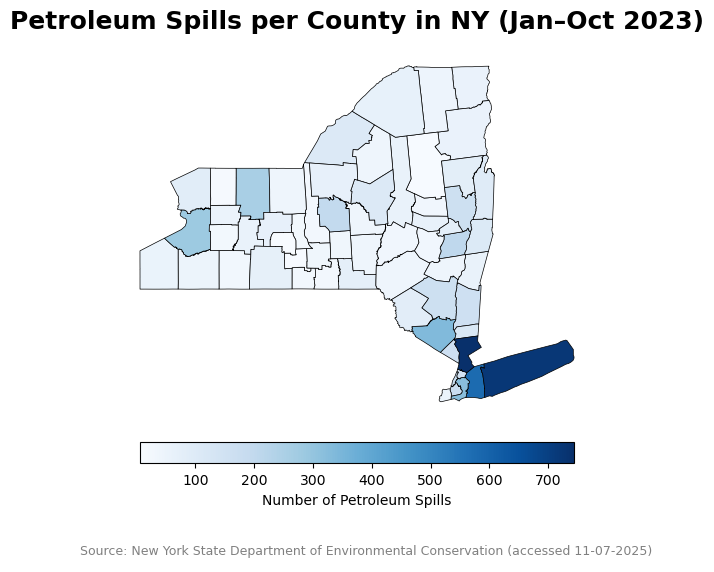

In [2]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

# Import the NY spills data as a variable named spills
fp = os.path.join("data/Spill_Incidents_20251107.csv")
spills = pd.read_csv(fp)

# Import the US counties data as a variable named counties
fp = os.path.join("data/tl_2022_us_county/tl_2022_us_county.shp")
counties = gpd.read_file(fp)

# Replace spaces with underscores in column names
spills.columns = spills.columns.str.replace(" ", "_")

# Lower case all column names
spills.columns = spills.columns.str.lower()

# Covert the spill_date, received_date, and close_date to numeric
spills['spill_date'] = pd.to_datetime(spills['spill_date'])
spills['close_date'] = pd.to_datetime(spills['close_date'])
spills['received_date'] = pd.to_datetime(spills['received_date'])

# Covert the spill_number, quantity, and recovered columns to numeric
spills['recovered'] = pd.to_numeric(spills['recovered'], errors = 'coerce')
spills['spill_number'] = pd.to_numeric(spills['spill_number'], errors = 'coerce')
spills['quantity'] = pd.to_numeric(spills['quantity'], errors = 'coerce')

# Select petroleum spills that occurred between January 1st 2023, and October 31st (including both dates), 2023.
petr_23 = spills[(spills["material_family"] == "Petroleum") &
                 (spills['spill_date'] >= "2023-01-01") & 
                 (spills['spill_date'] <= "2023-10-31")]

# Count the number of petroleum spills per county (Jan–Oct 2023)
spills_per_county = petr_23.groupby("county").size().reset_index(name="n_spills")

# Make the column names lower case
counties.columns = counties.columns.str.lower()

# Select all the counties for the state of New York and plot them
ny_counties = counties[counties['statefp'] == '36']

# Update 'St Lawrence' to 'St. Lawrence' in spills_per_county data frame
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')

# Rename the name column to county
ny_counties = ny_counties.rename(columns={'name': 'county'})

# Inner join the spills_per_county and ny_counties dataframes
ny_counties = pd.merge(spills_per_county,
                       ny_counties, 
                       how="inner",
                       on="county")

# Add one spill to Niagara county
ny_counties.loc[ny_counties["county"] == "Niagara", "n_spills"] += 1

# Convert ny_counties to a GeoDataFrame
ny_counties = gpd.GeoDataFrame(ny_counties, geometry='geometry')

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Plot choropleth
ny_counties.plot(
    ax=ax,
    column='n_spills',
    cmap='Blues',
    legend=True,
    linewidth=0.5,
    edgecolor='black',
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Petroleum Spills",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add an annotation with the data source (New York State Department of Environmental Conservation) and date of access
plt.annotate(
    'Source: New York State Department of Environmental Conservation (accessed 11-07-2025)',
    xy=(0.1, 0.03),
    xycoords='figure fraction',
    fontsize=9,
    color='gray'
)

# Add title and subtitle for better context
ax.set_title('Petroleum Spills per County in NY (Jan–Oct 2023)', fontsize=18, weight='bold', pad=15)

# Display the map
plt.show()

## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your commit history if you try to push them.

## 2. Datasets description
- Read the metadata for both datsets and write a brief description about each one. Indicate the date sources and date of access.

Oil spills data:

The oil spills dataset contains records of spills of petroleum and other hazardous materials. This dataset is still being updated—spills are typically added within 72 hours of the date they are reported. The data is recorded because, under state law and regulations, spills that could pollute the lands or waters of the state must be reported by the spiller (and, in some cases, by anyone who has knowledge of the spill). This data was accessed on November 7, 2025. The dataset was created on October 19, 2015, and was last updated on November 8, 2025. The source for the data is: New York State Department of Environmental Conservation (NYSDEC).

TIGER shapefile:

The tiger shapefile contains the geographic extent and boundaries of both legal and statistical entities (which have no governmental standing) for the United States. It was produced by the U.S. Census Bureau. The dataset uses the NAD 83 datum. This data was accessed on November 7, 2025. The source for this data set was: U.S. Census Bureau, Geography Division and the Topologically Integrated Geographic Encoding and Referencing (TIGER) Database.


## 3. Import libraries

In [3]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [4]:
# Import the NY spills data as a variable named spills
fp = os.path.join("data/Spill_Incidents_20251107.csv")
spills = pd.read_csv(fp)

# Import the US counties data as a variable named counties
fp = os.path.join("data/tl_2022_us_county/tl_2022_us_county.shp")
counties = gpd.read_file(fp)

<!-- BEGIN QUESTION -->

## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head

b. Check the data types of the columns

c. Check the unique values in the `material_family` column

d. Check the unique values in the `county` column

e. Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells for preliminary data exploration.

In [5]:
#a. Check the dataframe's head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10,Gallons,0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,NaN,0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0,Pounds,0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1,Gallons,0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6,Gallons,6


In [6]:
#b. Check the data types of the columns
spills.dtypes

Spill Number              int64
Program Facility Name    object
Street 1                 object
Street 2                 object
Locality                 object
County                   object
ZIP Code                 object
SWIS Code                 int64
DEC Region                int64
Spill Date               object
Received Date            object
Contributing Factor      object
Waterbody                object
Source                   object
Close Date               object
Material Name            object
Material Family          object
Quantity                 object
Units                    object
Recovered                object
dtype: object

In [7]:
#c. Check the unique values in the `material_family` column
spills["Material Family"].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [8]:
#d. Check the unique values in the `county` column
spills["County"].unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Oneida', 'Wayne', 'Suffolk',
       'Orleans', 'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison',
       'Chemung', 'Seneca', 'Broome', 'Hamilton', 'Washington', 'Steuben',
       'Rensselaer', 'Franklin', 'Columbia', 'Fulton', 'Herkimer',
       'Schoharie', 'Montgomery', 'Putnam', 'Delaware',
       'New Jersey - Region 2', 'Tioga', 'Chautauqua', 'Cattaraugus',
       'Wyoming', 'Yates', 'Greene', 'Pennsylvania - Region 9',
       'Allegany', 'New Jersey - Region 3 (N)',
       'Cattaraugus Indian Reservation', 'New Jersey - Region 3 (T)',
       'Canada - Region 6', 'Canada - Region 9',
       '

e. Type your answer here, replacing this text.

Insert a markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

While doing `spills.dtypes` I realized that the Spill Date, Received Date, Close Date, column are stored as objects instead of asdatetime format. After looking at the column names I saw that they contain capitals and spaces this should be changed to being all lower case and with underscores isntead of spaces. Most of the column in the data frame are stored as objects.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.B. Cleaning
a. Simplify column names as needed.

In [9]:
# Replace spaces with underscores in column names
spills.columns = spills.columns.str.replace(" ", "_")

# Lower case all column names
spills.columns = spills.columns.str.lower()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Update column data types as needed *for this analysis*.

In [10]:
# Print the data types of each column before they are changed
print(spills.dtypes)

# Covert the spill_date, received_date, and close_date to numeric
spills['spill_date'] = pd.to_datetime(spills['spill_date'])
spills['close_date'] = pd.to_datetime(spills['close_date'])
spills['received_date'] = pd.to_datetime(spills['received_date'])

# Covert the spill_number, quantity, and recovered columns to numeric
spills['recovered'] = pd.to_numeric(spills['recovered'], errors = 'coerce')
spills['spill_number'] = pd.to_numeric(spills['spill_number'], errors = 'coerce')
spills['quantity'] = pd.to_numeric(spills['quantity'], errors = 'coerce')

# Print the data types of each column to check if they were changed correctly
print(spills.dtypes)

spill_number              int64
program_facility_name    object
street_1                 object
street_2                 object
locality                 object
county                   object
zip_code                 object
swis_code                 int64
dec_region                int64
spill_date               object
received_date            object
contributing_factor      object
waterbody                object
source                   object
close_date               object
material_name            object
material_family          object
quantity                 object
units                    object
recovered                object
dtype: object
spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [11]:
# Select petroleum spills that occurred between January 1st 2023, and October 31st (including both dates), 2023.
petr_23 = spills[(spills["material_family"] == "Petroleum") &
                 (spills['spill_date'] >= "2023-01-01") & 
                 (spills['spill_date'] <= "2023-10-31")]

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print a message verifying that `petr_23` only has data for 2023 and from January through October.
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`.

In [12]:
# Print a message to verify that petr_23 only has data for 2023 and from January through October
print(f" The petr_23 dataframe only contains data from {petr_23.spill_date.dt.year.unique()}")
print(f" The petr_23 dataframe only contains the months  {petr_23.spill_date.dt.month.sort_values().unique()}")



 The petr_23 dataframe only contains data from [2023]
 The petr_23 dataframe only contains the months  [ 1  2  3  4  5  6  7  8  9 10]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [13]:
# Verify that petr_23 only has data for petroleum spills
assert (petr_23["material_family"] == "Petroleum").all()

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Two columns only.
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.

In [14]:
# Count the number of petroleum spills per county (Jan–Oct 2023)
spills_per_county = petr_23.groupby("county").size().reset_index(name="n_spills")
spills_per_county

,county,n_spills
0,Albany,206
1,Allegany,30
2,Bronx,143
3,Broome,75
4,Cattaraugus,47
...,...,...
59,Washington,96
60,Wayne,38
61,Westchester,744
62,Wyoming,24


In [15]:
grader.check("q5d")

q5d results: All test cases passed!

<!-- BEGIN QUESTION -->

## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head

b. Check the data types of the columns

c. Check the geo-dataframe's CRS

d. Plot the geo-dataframe

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

You can add any other cells of preliminary data exploration.

e. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

While checking the dtypes of the geo-dataframe i found that almost all the columns were stored as objects. The column names are in all caps. The CRS is EPSG:4269. There is a geometry column and the shapes are polygons.

In [16]:
# a. Check the geo-dataframe's head
counties.head(2)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."


In [17]:
# b. Check the data types of the columns
counties.dtypes

STATEFP       object
COUNTYFP      object
COUNTYNS      object
GEOID         object
NAME          object
NAMELSAD      object
LSAD          object
CLASSFP       object
MTFCC         object
CSAFP         object
CBSAFP        object
METDIVFP      object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

In [18]:
# c. Check the geo-dataframe's CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

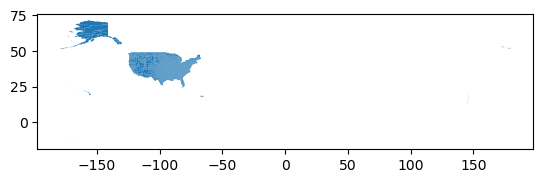

In [19]:
# d. Plot the geo-dataframe
counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [20]:
# Make the column names lower case
counties.columns = counties.columns.str.lower()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them (you may need to look at the metadata).

<Axes: >

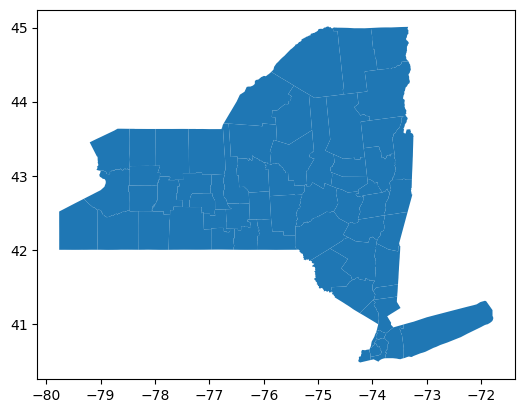

In [21]:
# Select all the counties for the state of New York and plot them
ny_counties = counties[counties['statefp'] == '36']
ny_counties.plot()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.


In [22]:
# Print the unique names of counties in ny_counties
print(ny_counties['name'].unique())

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.

In [23]:
# Print the names of unique counties in spills_per_county
print(spills_per_county['county'].unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Cattaraugus' 'Cayuga' 'Chautauqua'
 'Chemung' 'Chenango' 'Clinton' 'Columbia' 'Cortland' 'Delaware'
 'Dutchess' 'Erie' 'Essex' 'Franklin' 'Fulton' 'Genesee' 'Greene'
 'Hamilton' 'Herkimer' 'Jefferson' 'Kings' 'Lewis' 'Livingston' 'Madison'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2' 'New York'
 'Niagara' 'Oneida' 'Onondaga' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Putnam' 'Queens' 'Rensselaer' 'Richmond' 'Rockland' 'Saratoga'
 'Schenectady' 'Schoharie' 'Schuyler' 'Seneca' 'St Lawrence' 'Steuben'
 'Suffolk' 'Sullivan' 'Tioga' 'Tompkins' 'Tuscarora Indian Reservation'
 'Ulster' 'Warren' 'Washington' 'Wayne' 'Westchester' 'Wyoming' 'Yates']


<!-- END QUESTION -->



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 


In [24]:
# Identify counties that are in spills_per_county, but not in ny_counties
diff_names_spills = np.setdiff1d(spills_per_county['county'], ny_counties['name']).tolist()
diff_names_spills

['New Jersey - Region 2', 'St Lawrence', 'Tuscarora Indian Reservation']

In [25]:
grader.check("7Ac")

7Ac results: All test cases passed!

d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [26]:
# Identify counties that are in ny_counties, but not in spills_per_county
diff_names_ny = np.setdiff1d(ny_counties['name'], spills_per_county['county']).tolist()
diff_names_ny

['St. Lawrence']

In [27]:
grader.check("7Ad")

7Ad results: All test cases passed!

e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [28]:
# Display the number of spills in 'Tuscarora Indian Reservation'
spills_per_county.loc[spills_per_county['county'] == "Tuscarora Indian Reservation", 'n_spills'].item()

1

### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and Verify the update was successful.


In [29]:
# Update 'St Lawrence' to 'St. Lawrence' in spills_per_county data frame
spills_per_county['county'] = spills_per_county['county'].replace('St Lawrence', 'St. Lawrence')

# Verify the update was successful
spills_per_county['county'].unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New Jersey - Region 2', 'New York', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'St. Lawrence', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Tuscarora Indian Reservation', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates'],
      dtype=object)

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 


In [30]:
# Rename the name column to county
ny_counties = ny_counties.rename(columns={'name': 'county'})

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [31]:
# Inner join the spills_per_county and ny_counties dataframes
ny_counties = pd.merge(spills_per_county,
                       ny_counties, 
                       how="inner",
                       on="county")
# Verify the join
ny_counties.head()

,county,n_spills,statefp,countyfp,countyns,geoid,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,Albany,206,36,001,00974099,36001,Albany County,06,H1,G4020,None,None,None,A,1354273421,26971925,+42.5882401,-073.9740095,"POLYGON ((-73.96379 42.44162, -73.96666 42.441..."
1,Allegany,30,36,003,00974100,36003,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
2,Bronx,143,36,005,00974101,36005,Bronx County,06,H6,G4020,None,None,None,C,109235674,39353304,+40.8487111,-073.8529390,"POLYGON ((-73.93381 40.88221, -73.93365 40.882..."
3,Broome,75,36,007,00974102,36007,Broome County,06,H1,G4020,None,None,None,A,1827626589,25078245,+42.1619773,-075.8302833,"POLYGON ((-75.74223 41.99805, -75.75080 41.997..."
4,Cattaraugus,47,36,009,00974103,36009,Cattaraugus County,06,H1,G4020,None,None,None,A,3388125876,36783591,+42.2390986,-078.6623320,"POLYGON ((-78.69725 41.99867, -78.69881 41.998..."



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [32]:
# Add one spill to Niagara county
ny_counties.loc[ny_counties["county"] == "Niagara", "n_spills"] += 1

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation) and date of access



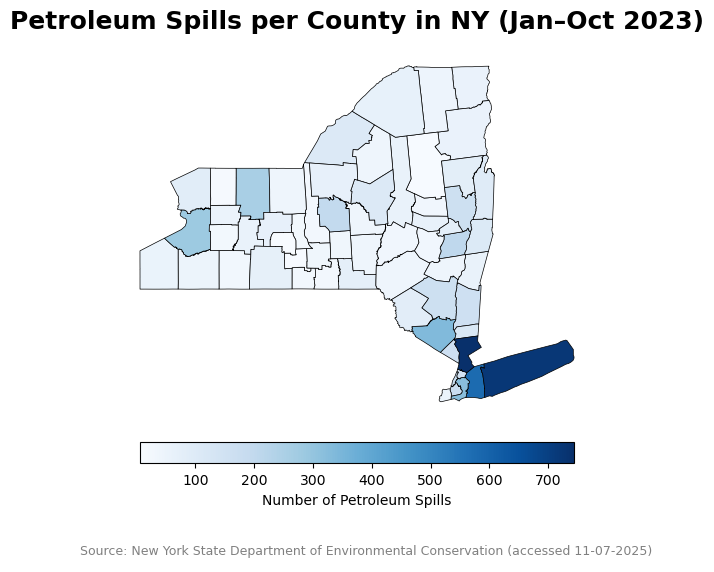

In [33]:
# Convert ny_counties to a GeoDataFrame
ny_counties = gpd.GeoDataFrame(ny_counties, geometry='geometry')

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Remove the axis for a cleaner map
ax.axis('off')

# Plot choropleth
ny_counties.plot(
    ax=ax,
    column='n_spills',
    cmap='Blues',
    legend=True,
    linewidth=0.5,
    edgecolor='black',
    legend_kwds={
        "shrink": 0.7,
        "label": "Number of Petroleum Spills",
        "orientation": "horizontal",
        "pad": 0.05
    }
)

# Add an annotation with the data source (New York State Department of Environmental Conservation) and date of access
plt.annotate(
    'Source: New York State Department of Environmental Conservation (accessed 11-07-2025)',
    xy=(0.1, 0.03),
    xycoords='figure fraction',
    fontsize=9,
    color='gray'
)

# Add title and subtitle for better context
ax.set_title('Petroleum Spills per County in NY (Jan–Oct 2023)', fontsize=18, weight='bold', pad=15)

# Display the map
plt.show()



b. Write a description of how the map was created, including key takeaways. If you need to do additional data analysis to include relevant information from the data, you may include additional cells here.

To make this map, I first wrangled the data. To do this I filtered petroleum spills from Jan–Oct 2023 and aggregated counts per county. Then, I cleaned cleaned names of columns and counties within those columns for consistency between datasets. I was then able to do an inner join and merge the data with the NY county geometries. I also added the spill that occured in Tuscarora Indian Reservation to Niagara County. I then created a choropleth map with blue color scale, county borders, horizontal legend, and no axes. This map shoes amount of spills that occured in each county. The darker the shade of blue the more spill that county had. The 3 counties with the highest spill counts were Westchester (744), Suffolk (723), and Nassau (576).

## Complete workflow

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the choropleth map of the number of petroleum spills per county in the state of New York in 2023. The only ouput of this cell should be the choropleth map  you produced in the previous exercise. Further guidance on what to include in this final workflow is in the assignment rubric.

##### Run the cell below to run all autograder tests. 

In [34]:
grader.check_all()

7Ac results: All test cases passed!

7Ad results: All test cases passed!

q5d results:
    q5d - 1 result:
        ❌ Test case failed
        Trying:
            def test_q3(student_data):
                try:
                    expected_data = pd.read_csv('data/q5d_df.csv').drop(columns='Unnamed: 0')
                    pd.testing.assert_frame_equal(expected_data, student_data)
                except AssertionError:
                    raise AssertionError('Incorrect answer.')
        Expecting nothing
        ok
        Trying:
            test_q3(spills_per_county)
        Expecting nothing
        **********************************************************************
        Line 7, in q5d 0
        Failed example:
            test_q3(spills_per_county)
        Exception raised:
            Traceback (most recent call last):
              File "<doctest q5d 0[0]>", line 4, in test_q3
                pd.testing.assert_frame_equal(expected_data, student_data)
              File "/op